In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [ ]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = train.iloc[:,1:].values / 255.0
y_train = train.iloc[:,0].values
X_test = test.iloc[:,1:].values / 255.0
y_test = test.iloc[:,0].values

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
def one_hot(y):
    out = np.zeros((len(y),10))
    out[np.arange(len(y)),y] = 1
    return out

y_train = one_hot(y_train)
y_test = one_hot(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.random.seed(42)

W1 = np.random.randn(6,3,3) * 0.01
b1 = np.zeros(6)

W2 = np.random.randn(12,3,3) * 0.01
b2 = np.zeros(12)

W3 = np.random.randn(432,128) * 0.01
b3 = np.zeros(128)

W4 = np.random.randn(128,10) * 0.01
b4 = np.zeros(10)

learning_rate = 0.01
epochs = 8
batch_size = 16

In [ ]:
W1

array([[[ 0.00496714, -0.00138264,  0.00647689],
        [ 0.0152303 , -0.00234153, -0.00234137],
        [ 0.01579213,  0.00767435, -0.00469474]],

       [[ 0.0054256 , -0.00463418, -0.0046573 ],
        [ 0.00241962, -0.0191328 , -0.01724918],
        [-0.00562288, -0.01012831,  0.00314247]],

       [[-0.00908024, -0.01412304,  0.01465649],
        [-0.00225776,  0.00067528, -0.01424748],
        [-0.00544383,  0.00110923, -0.01150994]],

       [[ 0.00375698, -0.00600639, -0.00291694],
        [-0.00601707,  0.01852278, -0.00013497],
        [-0.01057711,  0.00822545, -0.01220844]],

       [[ 0.00208864, -0.0195967 , -0.01328186],
        [ 0.00196861,  0.00738467,  0.00171368],
        [-0.00115648, -0.00301104, -0.01478522]],

       [[-0.00719844, -0.00460639,  0.01057122],
        [ 0.00343618, -0.0176304 ,  0.00324084],
        [-0.00385082, -0.00676922,  0.00611676]]])

In [ ]:
W2

array([[[ 1.03099952e-02,  9.31280119e-03, -8.39217523e-03],
        [-3.09212376e-03,  3.31263431e-03,  9.75545127e-03],
        [-4.79174238e-03, -1.85658977e-03, -1.10633497e-02]],

       [[-1.19620662e-02,  8.12525822e-03,  1.35624003e-02],
        [-7.20101216e-04,  1.00353290e-02,  3.61636025e-03],
        [-6.45119755e-03,  3.61395606e-03,  1.53803657e-02]],

       [[-3.58260391e-04,  1.56464366e-02, -2.61974510e-02],
        [ 8.21902504e-03,  8.70470682e-04, -2.99007350e-03],
        [ 9.17607765e-04, -1.98756891e-02, -2.19671888e-03]],

       [[ 3.57112572e-03,  1.47789404e-02, -5.18270218e-03],
        [-8.08493603e-03, -5.01757044e-03,  9.15402118e-03],
        [ 3.28751110e-03, -5.29760204e-03,  5.13267433e-03]],

       [[ 9.70775493e-04,  9.68644991e-03, -7.02053094e-03],
        [-3.27662147e-03, -3.92108153e-03, -1.46351495e-02],
        [ 2.96120277e-03,  2.61055272e-03,  5.11345664e-05]],

       [[-2.34587133e-03, -1.41537074e-02, -4.20645323e-03],
        [-3.42

In [ ]:
W3

array([[ 0.01158596, -0.00820682,  0.00963376, ...,  0.00588317,
         0.00280992, -0.006227  ],
       [-0.00208122, -0.00493001, -0.00589365, ..., -0.00748487,
         0.01551152,  0.00115675],
       [ 0.01179297,  0.00067518,  0.02060748, ...,  0.01441569,
        -0.02471645, -0.00796895],
       ...,
       [-0.00353624, -0.03151306, -0.0019342 , ..., -0.00135214,
         0.00605618, -0.01961573],
       [-0.00030793,  0.00185213, -0.00661303, ..., -0.00486718,
         0.00645545,  0.00331512],
       [ 0.03213307, -0.0090166 ,  0.01332905, ..., -0.0100467 ,
         0.01040976, -0.01314989]])

In [ ]:
#Activation Functions
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return x > 0

def softmax(x):
    exp = np.exp(x - np.max(x))
    return exp/np.sum(exp)


In [ ]:
def add_padding(image):
    return np.pad(image,((1,1),(1,1)),mode='constant')

def convolution(image,filters,bias):
    n,f,_ = filters.shape
    h,w = image.shape
    out = np.zeros((n,h-f+1,w-f+1))
    for k in range(n):
        for i in range(h-f+1):
            for j in range(w-f+1):
                out[k,i,j] = np.sum(image[i:i+f,j:j+f]*filters[k]) + bias[k]
    return out

def max_pool(x):
    h,w = x.shape
    out = np.zeros((h//2,w//2))
    mask = np.zeros_like(x)
    for i in range(0,h,2):
        for j in range(0,w,2):
            region = x[i:i+2,j:j+2]
            max_val = np.max(region)
            out[i//2,j//2] = max_val
            idx = np.unravel_index(np.argmax(region),region.shape)
            mask[i+idx[0],j+idx[1]] = 1
    return out,mask

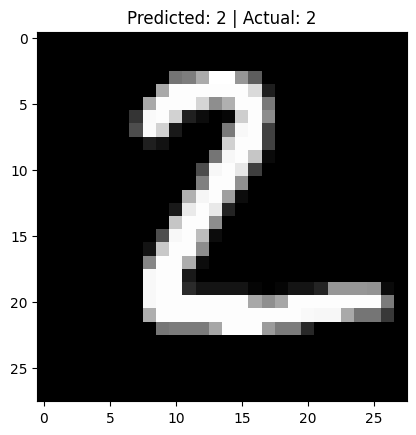

In [ ]:
# ==========================
# Display One Prediction
# ==========================

index = 1   # choose any test index

image = add_padding(X_test[index])

# ----- Forward Pass (matching training loop) -----
c1 = convolution(image, W1, b1)
r1 = relu(c1)

p1 = []
for fmap in r1:
    pooled, _ = max_pool(fmap)
    p1.append(pooled)
p1 = np.array(p1)

# Corrected Conv2 forward pass
c2_out_height = p1.shape[1] - W2.shape[1] + 1
c2_out_width = p1.shape[2] - W2.shape[2] + 1
c2 = np.zeros((W2.shape[0], c2_out_height, c2_out_width))
for fmap_input_idx in range(p1.shape[0]):
    fmap_input = p1[fmap_input_idx]
    c2 += convolution(fmap_input, W2, b2)

r2 = relu(c2)

p2 = []
for fmap in r2:
    pooled, _ = max_pool(fmap)
    p2.append(pooled)
p2 = np.array(p2)

flat = p2.flatten()

z3 = relu(np.dot(flat, W3) + b3)
z4 = np.dot(z3, W4) + b4
out = softmax(z4)

predicted_label = np.argmax(out)
actual_label = np.argmax(y_test[index])

plt.imshow(X_test[index], cmap='gray')
plt.title(f"Predicted: {predicted_label} | Actual: {actual_label}")
plt.show()

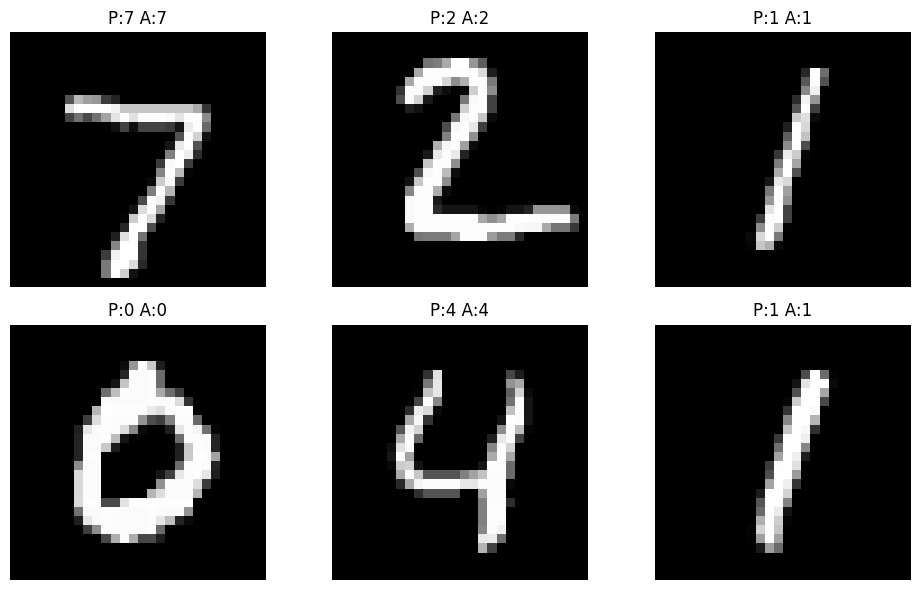

In [ ]:
# ==========================
# Display 6 Predictions
# ==========================

plt.figure(figsize=(10,6))

for i in range(6):
    image = add_padding(X_test[i])

    # ----- Forward Pass (matching training loop) -----
    c1 = convolution(image, W1, b1)
    r1 = relu(c1)

    p1 = []
    for fmap in r1:
        pooled, _ = max_pool(fmap)
        p1.append(pooled)
    p1 = np.array(p1)

    # Corrected Conv2 forward pass
    c2_out_height = p1.shape[1] - W2.shape[1] + 1
    c2_out_width = p1.shape[2] - W2.shape[2] + 1
    c2 = np.zeros((W2.shape[0], c2_out_height, c2_out_width))
    for fmap_input_idx in range(p1.shape[0]):
        fmap_input = p1[fmap_input_idx]
        c2 += convolution(fmap_input, W2, b2)

    r2 = relu(c2)

    p2 = []
    for fmap in r2:
        pooled, _ = max_pool(fmap)
        p2.append(pooled)
    p2 = np.array(p2)

    flat = p2.flatten()

    z3 = relu(np.dot(flat, W3) + b3)
    z4 = np.dot(z3, W4) + b4
    out = softmax(z4)

    pred = np.argmax(out)
    actual = np.argmax(y_test[i])

    plt.subplot(2,3,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"P:{pred} A:{actual}")
    plt.axis("off")

plt.tight_layout()
plt.show()

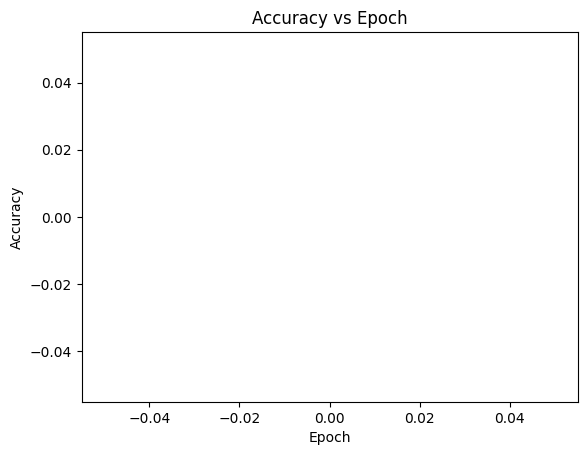

In [ ]:
plt.plot(accuracies)
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

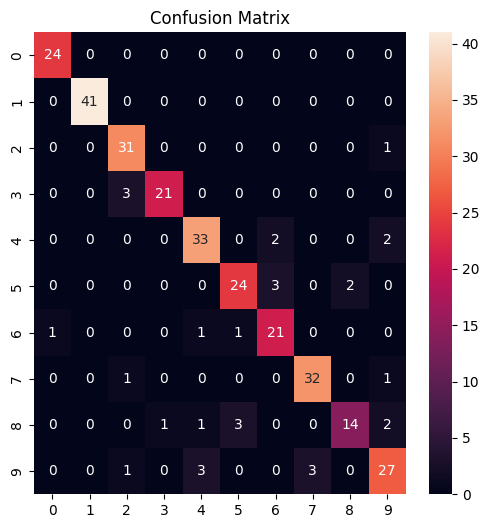

In [ ]:
y_true=[]
y_pred=[]

for i in range(300):

    image = add_padding(X_test[i])

    # ----- Forward Pass (matching training loop) -----
    c1 = convolution(image, W1, b1)
    r1 = relu(c1)

    p1 = []
    for fmap in r1:
        pooled, _ = max_pool(fmap)
        p1.append(pooled)
    p1 = np.array(p1)

    # Corrected Conv2 forward pass
    c2_out_height = p1.shape[1] - W2.shape[1] + 1
    c2_out_width = p1.shape[2] - W2.shape[2] + 1
    c2 = np.zeros((W2.shape[0], c2_out_height, c2_out_width))
    for fmap_input_idx in range(p1.shape[0]):
        fmap_input = p1[fmap_input_idx]
        c2 += convolution(fmap_input, W2, b2)

    r2 = relu(c2)

    p2 = []
    for fmap in r2:
        pooled, _ = max_pool(fmap)
        p2.append(pooled)
    p2 = np.array(p2)

    flat = p2.flatten()

    z3 = relu(np.dot(flat, W3) + b3)
    z4 = np.dot(z3, W4) + b4
    out = softmax(z4)

    y_true.append(np.argmax(y_test[i]))
    y_pred.append(np.argmax(out))

cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

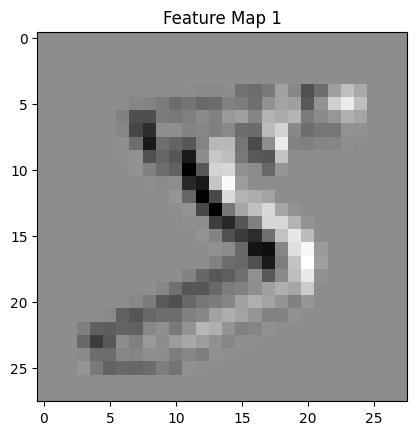

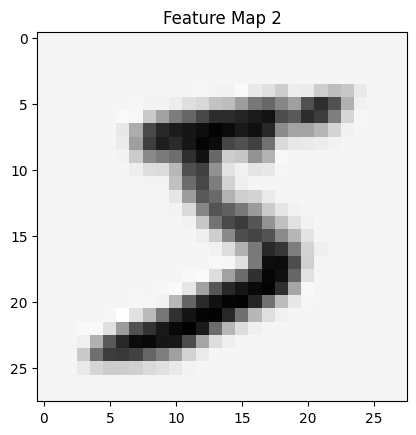

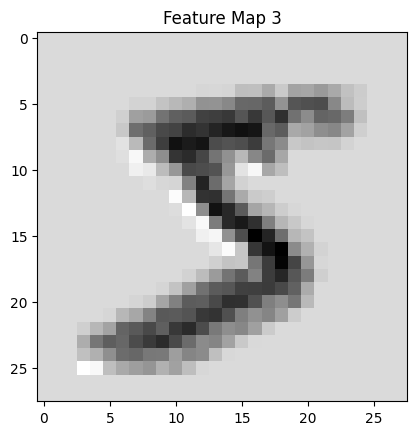

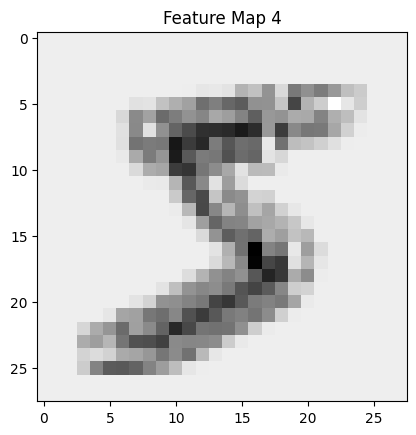

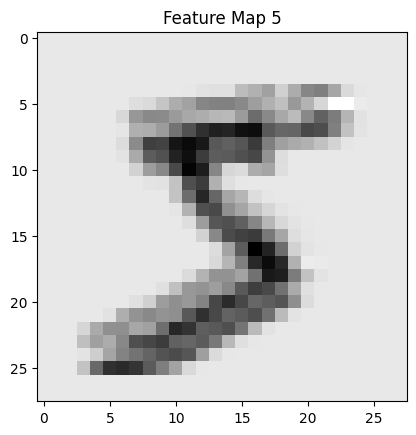

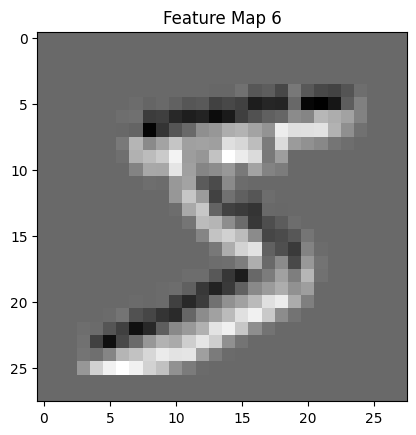

In [ ]:
sample = add_padding(X_train[0])
conv_maps = convolution(sample,W1,b1)

for i in range(W1.shape[0]):
    plt.imshow(conv_maps[i],cmap='gray')
    plt.title(f"Feature Map {i+1}")
    plt.show()

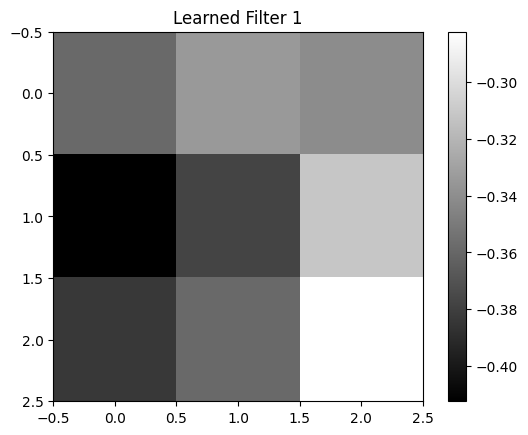

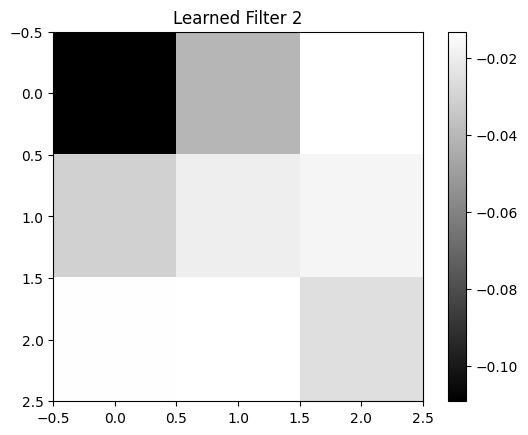

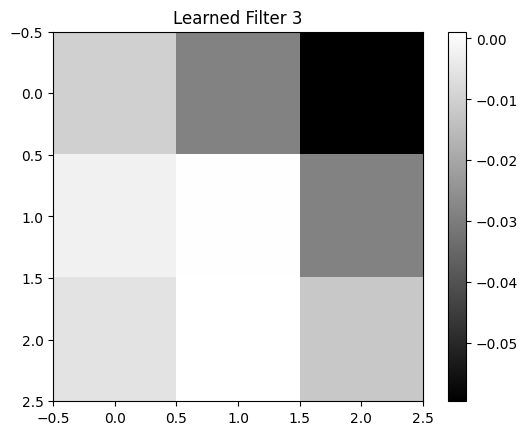

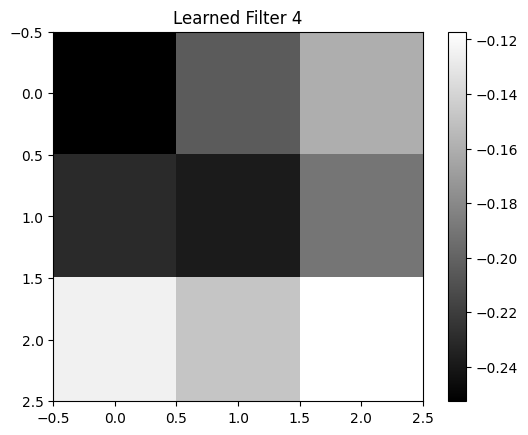

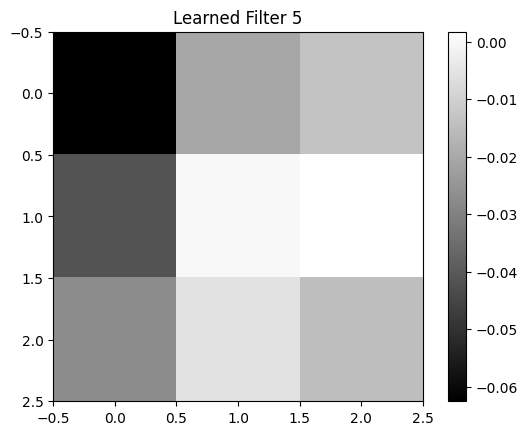

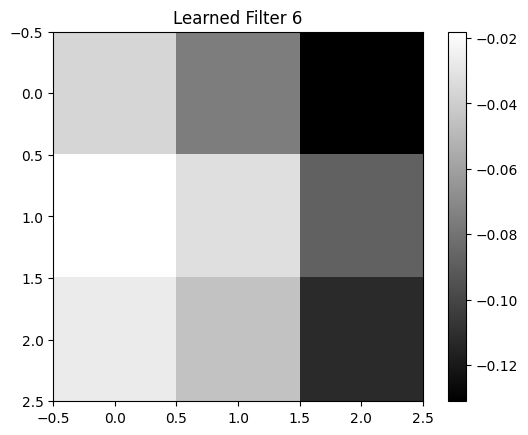

In [ ]:
for i in range(W1.shape[0]):
    plt.imshow(W1[i],cmap='gray')
    plt.title(f"Learned Filter {i+1}")
    plt.colorbar()
    plt.show()

In [ ]:
np.random.seed(42)

W1 = np.random.randn(6,3,3) * np.sqrt(2/(3*3))
b1 = np.zeros(6) + 0.01

W2 = np.random.randn(12,3,3) * np.sqrt(2/(3*3))
b2 = np.zeros(12) + 0.01

W3 = np.random.randn(432,128) * np.sqrt(2/432)
b3 = np.zeros(128) + 0.01

W4 = np.random.randn(128,10) * np.sqrt(2/128)
b4 = np.zeros(10) + 0.01

learning_rate = 0.001
epochs = 10
batch_size = 16

In [ ]:
losses=[]
accuracies=[]

for epoch in range(epochs):

    total_loss=0
    correct=0

    for i in range(0,1000,batch_size):

        for j in range(batch_size):

            idx=i+j
            image=add_padding(X_train[idx])

            # ----- Forward -----
            c1=convolution(image,W1,b1)
            r1=relu(c1)

            p1=[]
            masks1=[]
            for fmap in r1:
                pooled,mask=max_pool(fmap)
                p1.append(pooled)
                masks1.append(mask)
            p1=np.array(p1)

            # Corrected Conv2 forward pass
            c2_out_height = p1.shape[1]-W2.shape[1]+1 # 14 - 3 + 1 = 12
            c2_out_width = p1.shape[2]-W2.shape[2]+1  # 14 - 3 + 1 = 12
            c2=np.zeros((W2.shape[0], c2_out_height, c2_out_width)) # Expected (12, 12, 12)
            for fmap_input_idx in range(p1.shape[0]): # Iterate through each of the 6 input feature maps from p1
                fmap_input = p1[fmap_input_idx] # (14,14)
                # Apply all 12 filters from W2 to this single input feature map and sum the results
                c2 += convolution(fmap_input, W2, b2)

            r2=relu(c2)

            p2=[]
            masks2=[]
            for fmap in r2:
                pooled,mask=max_pool(fmap)
                p2.append(pooled)
                masks2.append(mask)
            p2=np.array(p2) # (12, 6, 6)

            flat=p2.flatten() # (432,)

            z3=relu(np.dot(flat,W3)+b3)
            z4=np.dot(z3,W4)+b4
            out=softmax(z4)

            loss=-np.sum(y_train[idx]*np.log(out+1e-8))
            total_loss+=loss

            if np.argmax(out)==np.argmax(y_train[idx]):
                correct+=1

            # ----- Backprop -----
            dz4=out-y_train[idx]
            dW4=np.outer(z3,dz4)
            db4=dz4

            dz3=np.dot(W4,dz4)*relu_derivative(z3)
            dW3=np.outer(flat,dz3)
            db3=dz3

            dflat=np.dot(W3,dz3)
            dpool2=dflat.reshape(p2.shape) # (12, 6, 6)

            dconv2=np.zeros_like(c2) # (12, 12, 12)
            for k in range(W2.shape[0]): # Loop through the 12 output feature maps
                mask=masks2[k] # mask for the k-th output feature map
                for x_m in range(mask.shape[0]): # Iterate over mask dimensions
                    for y_m in range(mask.shape[1]):
                        if mask[x_m,y_m]==1:
                            dconv2[k,x_m,y_m]=dpool2[k,x_m//2,y_m//2]

            dconv2*=relu_derivative(c2)

            dW2=np.zeros_like(W2) # (12,3,3)
            db2=np.zeros_like(b2) # (12,)

            # Factor for bias gradient due to summation across input feature maps
            bias_grad_factor = p1.shape[0] # Number of input feature maps to Conv2 (6)

            for k_out in range(W2.shape[0]): # For each of the 12 output filters
                db2[k_out]=np.sum(dconv2[k_out]) * bias_grad_factor # Corrected: multiply by factor

                # Accumulate gradients for W2[k_out] from all 6 input feature maps (p1)
                for fmap_input_idx in range(p1.shape[0]):
                    input_fmap = p1[fmap_input_idx] # (14,14) from p1
                    # Correlate input_fmap with the error signal dconv2[k_out]
                    for x_f in range(W2.shape[1]): # filter height (3)
                        for y_f in range(W2.shape[2]): # filter width (3)
                            # Sum over the regions where the filter was applied
                            dW2[k_out, x_f, y_f] += np.sum(input_fmap[x_f:x_f+dconv2.shape[1], y_f:y_f+dconv2.shape[2]] * dconv2[k_out])

            # --- Calculate dp1 (gradient for p1) ---
            dp1 = np.zeros_like(p1) # Shape (6, 14, 14)

            for fmap_input_idx in range(p1.shape[0]): # For each input feature map to Conv2 (i.e., each feature map in p1)
                deconv_sum_for_fmap = np.zeros_like(p1[0]) # (14,14)
                for k_out in range(W2.shape[0]): # For each output filter of Conv2
                    # Perform transpose convolution of dconv2[k_out] with W2[k_out]
                    dconv2_slice = dconv2[k_out] # (12,12)
                    rotated_filter = np.rot90(W2[k_out], 2) # (3,3) # Rotate filter by 180 degrees

                    # Correctly compute deconv_output (gradient w.r.t. input of convolution)
                    # dX = full_convolution(dY, rotated_filter)
                    deconv_output_current_k_out = np.zeros((p1.shape[1], p1.shape[2])) # (14,14)
                    for r_dY in range(dconv2_slice.shape[0]):
                        for c_dY in range(dconv2_slice.shape[1]):
                            # Add the product of the gradient element and the rotated filter
                            # to the corresponding region in deconv_output_current_k_out
                            deconv_output_current_k_out[r_dY : r_dY + rotated_filter.shape[0],
                                                        c_dY : c_dY + rotated_filter.shape[1]] += \
                                dconv2_slice[r_dY, c_dY] * rotated_filter

                    deconv_sum_for_fmap += deconv_output_current_k_out
                dp1[fmap_input_idx] = deconv_sum_for_fmap

            # Backprop through Pool1
            dconv1=np.zeros_like(c1) # (6, 28, 28)
            for k in range(W1.shape[0]): # Iterate through the 6 feature maps
                mask=masks1[k] # (28,28)
                # Unpooling: scatter gradient from dp1[k] to dconv1[k] using mask
                for x_m in range(mask.shape[0]):
                    for y_m in range(mask.shape[1]):
                        if mask[x_m,y_m]==1:
                            dconv1[k,x_m,y_m]=dp1[k,x_m//2,y_m//2] # Correctly assign error from dp1

            dconv1*=relu_derivative(c1)

            dW1=np.zeros_like(W1)
            db1=np.zeros_like(b1)

            for k in range(W1.shape[0]):
                db1[k]=np.sum(dconv1[k])
                for x_f in range(W1.shape[1]):
                    for y_f in range(W1.shape[2]):
                        region=image[x_f:x_f+dconv1.shape[1],y_f:y_f+dconv1.shape[2]]
                        dW1[k,x_f,y_f]=np.sum(region*dconv1[k])

            # ----- Update -----
            W4-=learning_rate*dW4
            b4-=learning_rate*db4
            W3-=learning_rate*dW3
            b3-=learning_rate*db3
            W2-=learning_rate*dW2
            b2-=learning_rate*db2
            W1-=learning_rate*dW1
            b1-=learning_rate*db1

    losses.append(total_loss/1000)
    accuracies.append(correct/1000)
    print(f"Epoch {epoch+1} | Loss {losses[-1]} | Accuracy {accuracies[-1]}")

Epoch 1 | Loss 0.32748283718629734 | Accuracy 0.91
Epoch 2 | Loss 0.29698160280764935 | Accuracy 0.923
Epoch 3 | Loss 0.27328727497441674 | Accuracy 0.928
Epoch 4 | Loss 0.2550106513982677 | Accuracy 0.936
Epoch 5 | Loss 0.23914934598642404 | Accuracy 0.946
Epoch 6 | Loss 0.22490925375918472 | Accuracy 0.951
Epoch 7 | Loss 0.21203256316032204 | Accuracy 0.953
Epoch 8 | Loss 0.20187561417427796 | Accuracy 0.958
Epoch 9 | Loss 0.1953764317351976 | Accuracy 0.962
Epoch 10 | Loss 0.19773506004063449 | Accuracy 0.96
